# Wake Diffusion Tests

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib notebook
pi2 = np.pi*2

In [2]:
# Set style of plots
colwidth=3.5
figwidth=6
figheight=4.5
ticksize= 8 *figwidth/colwidth 
labelsize=10 *figwidth/colwidth
titlesize = 10 *figwidth/colwidth
annotatesize= ticksize*1
# mpl.style.use('classic')
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize})
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':labelsize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-3,3]})
mpl.rcParams.update({'figure.figsize':[figwidth,figheight]})
mpl.rcParams.update({'image.cmap':'jet'})
mpl.rcParams.update({'axes.formatter.useoffset':True})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# To get sans-serif
# mpl.rc('font', **{'sans-serif' : 'Arial','family' : 'sans-serif'})

# To use unicode
# params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
# params = {'text.usetex': True , 'mathtext.fontset': 'stixsans'}
# plt.rcParams.update(params)

# To be able to use SI units as micro (automatically upright)
# plt.rc('text', usetex = True)
# params = {'text.latex.preamble': [r'\usepackage{siunitx}', r'\usepackage{cmbright}']}
# plt.rcParams.update(params)


In [3]:

def rotation(a,b,C,S):
    temp = a
    a = C*a  + S*b
    b = -S*temp + C*b
    return a,b



In [5]:
# Zero noise, vary g
plt.figure(num=3,figsize=(8,6)) ; 

<Figure size 576x432 with 0 Axes>

In [6]:
# Vary noise Const g, normalize to XI
# amplitude prop to XI.

plt.figure(2,figsize=(8,6)) ;

<Figure size 576x432 with 0 Axes>

<IPython.core.display.Javascript object>


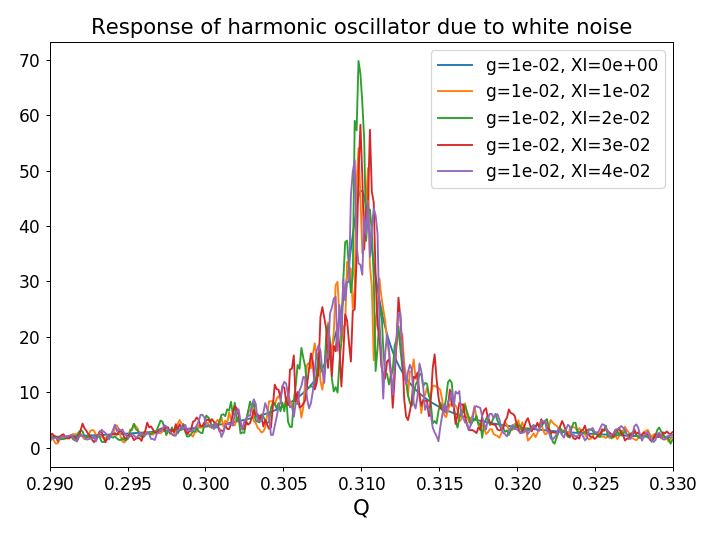

In [76]:
# Vary noise Const g, normalized to average
# -> It is the same shape  for all, simply lagrer amplitude for larger Q

plt.figure(1,figsize= (8,6)) ;

In [9]:
Nt = 1024*8*1
Q = 0.31
C = np.cos(pi2*Q)
S = np.sin(pi2*Q)

g = 1e-2 * 1
XI= 1e-2 *.01

x0=1e-3
p0=0

x = np.zeros(Nt); x[0] = x0
p = np.zeros(Nt); p[0] = p0


for i in range(Nt-1):
    xi,pi = x[i],p[i] 

<IPython.core.display.Javascript object>


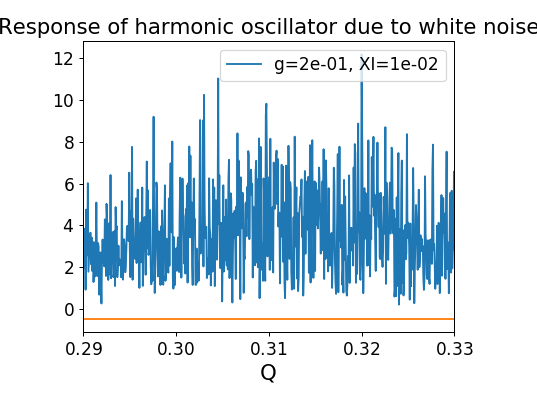

<IPython.core.display.Javascript object>


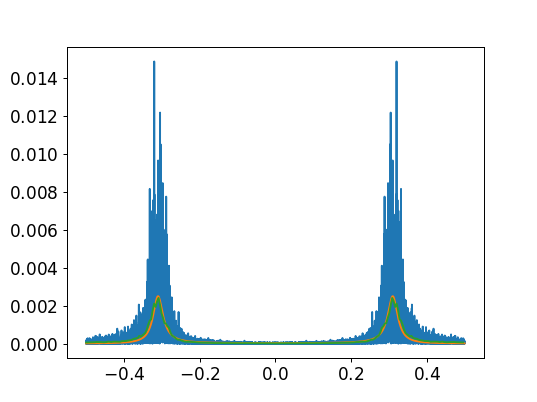

meant=2.74e-04  
meanf=2.74e-04   (Sim)
meanf=2.47e-04   (Theory) 
Ratio(Sim/Theory) = 1.11
meant=2.50e-04    (Theory 1) 
meant=2.50e-04   (Theory 2)


In [170]:

Tstart = 1000*1
Nt = 1024*2**4 + Tstart
Q = 1.31
C = np.cos(pi2*Q)
S = np.sin(pi2*Q)

g = 1e-2 * 20
XI= 1e-2 *1

x0=1e-3
p0=0

x = np.zeros(Nt); x[0] = x0
p = np.zeros(Nt); p[0] = p0


for i in range(Nt-1):
#     xi,pi = x[i],p[i] 
    xi,pi = rotation(xi,pi,C,S)
    pi -= g*pi
    pi += np.random.randn(1)*XI
    x[i+1],p[i+1] = xi,pi
    
    
# Plotting
A = np.fft.fft(x[Tstart:],norm='ortho')
A = np.abs(A)
# A[1:-1]= (A[:-2]+A[1:-1]+A[2:])/3
f = np.fft.fftfreq(Nt-Tstart,1)
f = np.fft.fftshift(f) ; 
A = np.fft.fftshift(A) ; 

# if 0:

plt.figure(12)
plt.plot(f,A/[np.mean(A),XI,np.max(A)][1],label='g=%.0e, XI=%.0e'%(g,XI))
plt.plot(f,)
plt.xlim(Q%1-0.02,Q%1+0.02)
plt.title('Response of harmonic oscillator due to white noise')
plt.xlabel('Q')
plt.tight_layout()
plt.legend(loc=0);

plt.figure(13)
plt.plot(f,A**2)
w = f*pi2
mu= (Q%1)*pi2
func = XI**2/((w**2-mu**2)**2+4*mu**2*(g/2)**2) *mu**2
plt.plot(f,func)

f2,PSD = signal.welch(x[Tstart:],fs = 1,return_onesided=False) #; PSD=PSD/2
f2 = np.fft.fftshift(f2) ; 
PSD = np.fft.fftshift(PSD) ;
plt.plot(f2,PSD)
print('meant=%.2e  \nmeanf=%.2e   (Sim)\nmeanf=%.2e   (Theory) \nRatio(Sim/Theory) = %.2f'%(
        np.mean(x[Tstart:]**2),np.mean(A**2),np.mean(func),np.mean(A**2)/np.mean(func)))
print('meant=%.2e    (Theory 1) \nmeant=%.2e   (Theory 2)'%(XI**2/(2*g), XI**2/(2*g)))

In [174]:
print('x(t)^2 =',np.sum(x**2))
xf = np.abs(np.fft.fft(x,norm=[None,'ortho'][0]))
print('x(f)^2 =',np.sum(xf**2)/np.size(xf), np.mean(xf**2))

x(t)^2 = 4.756288841749629
x(f)^2 = 4.756288841749623 4.756288841749623


x(t)^2 = 1.0076602947292486
x(f)^2 = 1.0076602947292488 10000


<IPython.core.display.Javascript object>


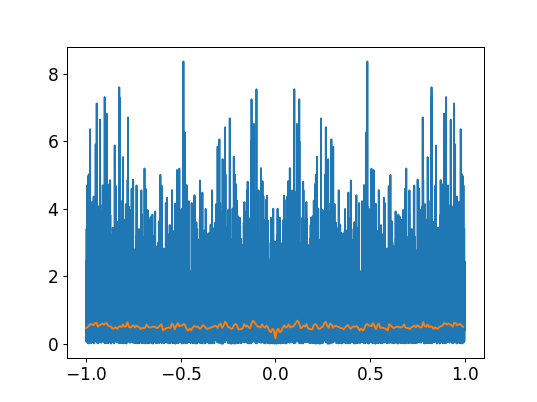

x(t)^2 = 1.0076602947292486
x(f)^2 = 1.0083681918530878


In [181]:
N = 10**4
y = np.random.randn(N)
print('x(t)^2 =',np.sum(y**2)/1e4)
yf = np.fft.fftshift(np.abs(np.fft.fft(y,norm='ortho')))
print('x(f)^2 =',np.sum(yf**2)/1e4, np.size(yf))

FS= 2
f = np.linspace(-FS/2,FS/2,np.size(yf))
plt.figure()
plt.plot(f,yf**2)
f2,PSD = signal.welch(y,fs=FS,return_onesided=False,)
f2 = np.fft.fftshift(f2) ; 
PSD = np.fft.fftshift(PSD) ;
plt.plot(f2,PSD)

print('x(t)^2 =',np.mean(y**2))
print('x(f)^2 =',np.mean(PSD)*N   *FS/N)

In [101]:
x = np.arange(10)
x = np.fft.fftshift(x)
print(x)

[5 6 7 8 9 0 1 2 3 4]
